In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.metrics import precision_recall_fscore_support, confusion_matrix
%matplotlib inline

# Data collection

## Load data

Load daily food log

In [2]:
# food = pd.concat(pd.read_csv(filename, thousands=',', parse_dates=['Date']) for filename in os.listdir('.') if filename.startswith('Weekly'))
food = pd.read_csv('food.csv')
food.head()

,Date,Name,Type,Quantity,Units,Calories,Fat (g),Protein (g),Carbohydrates (g),Saturated Fat (g),Sugars (g),Fiber (g),Cholesterol (mg),Sodium (mg)
0,2018-11-03,Bun Thit Nuong,Breakfast,1.0,Serving,500,17.00,22.00,33.00,3.00,0.0,NaN,36.00,900.00
1,2018-11-02,"Egg, Fried, Large",Breakfast,48.0,Grams,94,7.35,6.54,0.43,2.60,0.4,0.00,219.36,97.92
2,2018-11-02,Boiled Water Spinach,Breakfast,50.0,Grams,8,0.35,0.85,0.20,0.27,0.1,1.15,NaN,23.50
3,2018-11-02,"Fish Ball, Asian Style, Cooked",Breakfast,100.0,Grams,76,0.80,12.30,4.50,0.20,1.4,0.00,72.00,650.00
4,2018-11-02,"Spinach, Baby, Boiled in Unsalted Water",Breakfast,200.0,Grams,40,2.00,6.00,0.00,0.00,0.0,2.00,0.00,84.00


In [3]:
daily_cal = food.groupby('Date')['Calories'].sum()

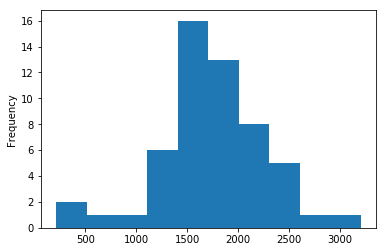

In [4]:
daily_cal.plot.hist()
plt.show()

In [18]:
budget = pd.read_csv('budget.csv', index_col=0, parse_dates=[0], header=None, squeeze=True)
steps = pd.read_csv('steps.csv', index_col=0, parse_dates=[0], header=None, squeeze=True)
weights = pd.read_csv('weights.csv', index_col=0, parse_dates=[0], header=None, squeeze=True)

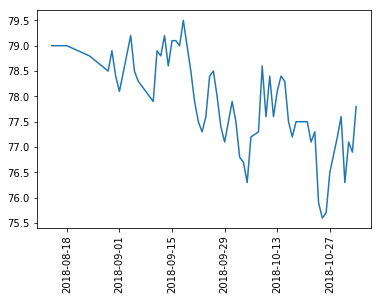

In [42]:
plt.plot(weights.index, weights.values)
plt.xticks(rotation=90)
plt.show()

In [220]:
weight['Tomorrow weight'] = weight.reindex(weight.index + pd.Timedelta(1, unit='D')).values
weight['Weight gain'] = weight['Tomorrow weight'] - weight['Weight']
weight

,Weight,Tomorrow weight,Weight gain
Date,,,
2018-11-03,77.8,NaN,NaN
2018-11-02,76.9,77.8,0.9
2018-11-01,77.1,76.9,-0.2
2018-10-31,76.3,77.1,0.8
2018-10-30,77.6,76.3,-1.3
2018-10-29,77.2,77.6,0.4
2018-10-27,76.5,NaN,NaN
2018-10-26,75.7,76.5,0.8
2018-10-25,75.6,75.7,0.1


In [221]:
df_joined = pd.concat([daily_cal, weight, budget_step], axis=1)
df = df_joined.dropna().copy()

In [222]:
df['Calories surplus'] = df['Calories'] - df['Budget']

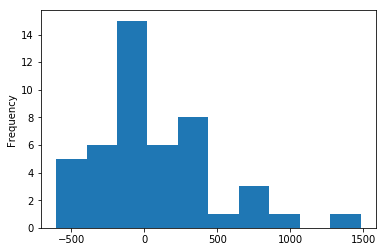

In [223]:
df['Calories surplus'].plot.hist()

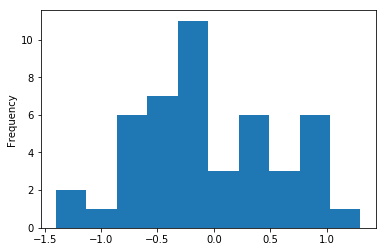

In [225]:
df['Weight gain'].plot.hist()

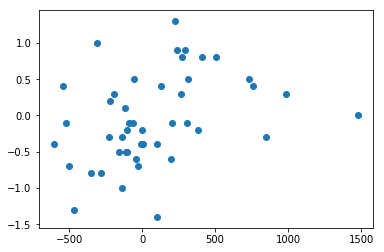

In [226]:
plt.scatter(df['Calories surplus'], df['Weight gain'])

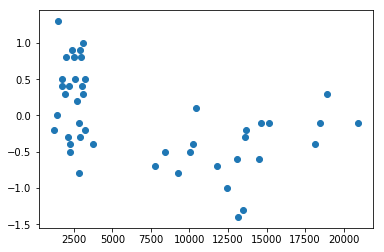

In [227]:
plt.scatter(df['Steps'], df['Weight gain'])

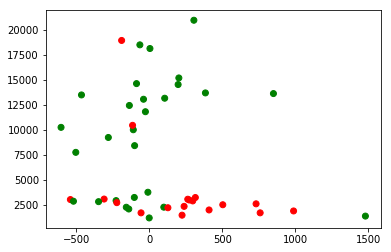

In [228]:
plt.scatter(df['Calories surplus'], df['Steps'], color=list(np.where(df['Weight gain'] > 0, 'Red', 'Green')))

In [229]:
X = df[['Calories surplus', 'Steps']]
y = df['Weight gain'] > 0

In [230]:
y_train.value_counts()

False    22
True     12
Name: Weight gain, dtype: int64

In [231]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((34, 2), (12, 2), (34,), (12,))

In [232]:
log = LogisticRegression(random_state=42)

In [233]:
y_pred_cv = cross_val_predict(log, X_train, y_train, cv=5)

In [234]:
confusion_matrix(y_train, y_pred_cv)

array([[20,  2],
       [ 8,  4]])

In [235]:
log.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=42, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [236]:
log.coef_

array([[ 0.00107386, -0.00013623]])